In [194]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

### Load CSV File

In [195]:
# Load car loan data from a csv file
# Dataset source: https://data.boston.gov/dataset/shootings
filename = 'data/boston_shooting.csv'
df = pd.read_csv(filename)
df

,Incident_Num,Shooting_Date,District,Shooting_Type_V2,Victim_Gender,Victim_Race,Victim_Ethnicity_NIBRS,Multi_Victim
0,I152000196-00,2015-01-01 13:30:00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
1,I152000879-00,2015-01-04 01:58:00,E18,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
2,I152001014-00,2015-01-04 18:52:00,E5,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
3,I152002232-00,2015-01-08 22:45:00,B2,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,t
4,I152002233-00,2015-01-08 22:45:00,B2,Non-Fatal,Female,Black or African American,Not Hispanic or Latinx,t
...,...,...,...,...,...,...,...,...
1658,222043221,2022-06-12 21:27:00,B2,Fatal,Male,Black or African American,Not Hispanic or Latinx,f
1659,222042669,2022-06-10 22:46:00,C11,Non-Fatal,Male,Black or African American,Unknown,f
1660,222043262,2022-06-13 01:34:00,E13,Non-Fatal,Male,White,Hispanic or Latinx,f
1661,222045881,2022-06-21 18:34:00,B3,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Incident_Num            1663 non-null   object
 1   Shooting_Date           1663 non-null   object
 2   District                1663 non-null   object
 3   Shooting_Type_V2        1663 non-null   object
 4   Victim_Gender           1656 non-null   object
 5   Victim_Race             1649 non-null   object
 6   Victim_Ethnicity_NIBRS  1639 non-null   object
 7   Multi_Victim            1663 non-null   object
dtypes: object(8)
memory usage: 104.1+ KB


## Clean data
Take incident no, date, gender and race and remove the rows with null values

In [197]:
df. drop('Victim_Ethnicity_NIBRS', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Incident_Num      1663 non-null   object
 1   Shooting_Date     1663 non-null   object
 2   District          1663 non-null   object
 3   Shooting_Type_V2  1663 non-null   object
 4   Victim_Gender     1656 non-null   object
 5   Victim_Race       1649 non-null   object
 6   Multi_Victim      1663 non-null   object
dtypes: object(7)
memory usage: 91.1+ KB


In [198]:
# Get all the gender and race missing cols
victim_gender_missing = df.Victim_Gender.isna()
victim_race_missing = df.Victim_Race.isna()

In [199]:
# Remove all the gender and race missing cols from the DF
df = df.loc[~victim_gender_missing,:]
df = df.loc[~victim_race_missing,:]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646 entries, 0 to 1662
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Incident_Num      1646 non-null   object
 1   Shooting_Date     1646 non-null   object
 2   District          1646 non-null   object
 3   Shooting_Type_V2  1646 non-null   object
 4   Victim_Gender     1646 non-null   object
 5   Victim_Race       1646 non-null   object
 6   Multi_Victim      1646 non-null   object
dtypes: object(7)
memory usage: 102.9+ KB


## Sub dataframing

In [200]:
# Using DataFrame.loc[] create new DataFrame by specific column.
gender_based_df = df.loc[:, df.columns.drop(['District', 'Shooting_Type_V2', 'Multi_Victim'])]
gender_based_df = gender_based_df.rename(columns={
  'Incident_Num': 'Incident Number',
  'Shooting_Date': 'Year',
  'Victim_Gender': 'Victim Gender',
  'Victim_Race': 'Victim Race'
})
gender_based_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646 entries, 0 to 1662
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Incident Number  1646 non-null   object
 1   Year             1646 non-null   object
 2   Victim Gender    1646 non-null   object
 3   Victim Race      1646 non-null   object
dtypes: object(4)
memory usage: 64.3+ KB


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646 entries, 0 to 1662
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Incident_Num      1646 non-null   object
 1   Shooting_Date     1646 non-null   object
 2   District          1646 non-null   object
 3   Shooting_Type_V2  1646 non-null   object
 4   Victim_Gender     1646 non-null   object
 5   Victim_Race       1646 non-null   object
 6   Multi_Victim      1646 non-null   object
dtypes: object(7)
memory usage: 102.9+ KB


In [202]:
gender_based_df.isna().sum()

Incident Number    0
Year               0
Victim Gender      0
Victim Race        0
dtype: int64

### Clone the dataframe in multiple sub-dfs to perform various visualizations 
Here we will change the date to year only

In [203]:
# print(gender_based_df['Year'].dtypes)
gender_based_df['Year'] = gender_based_df['Year'].str[:4]
print(gender_based_df)

     Incident Number  Year Victim Gender                Victim Race
0      I152000196-00  2015          Male  Black or African American
1      I152000879-00  2015          Male  Black or African American
2      I152001014-00  2015          Male  Black or African American
3      I152002232-00  2015          Male  Black or African American
4      I152002233-00  2015        Female  Black or African American
...              ...   ...           ...                        ...
1658       222043221  2022          Male  Black or African American
1659       222042669  2022          Male  Black or African American
1660       222043262  2022          Male                      White
1661       222045881  2022          Male  Black or African American
1662       222046251  2022          Male                      White

[1646 rows x 4 columns]


In [208]:
# Get the list of victim races in the dataframe
victim_races = gender_based_df['Victim Race'].unique()
print('Original Races List', victim_races)
# Get the list of years in the dataframe
years = gender_based_df['Year'].unique()
# years = years.astype(int)
print(years)
# Get the counts of all the race types in the DF
gender_based_df['Victim Race'].value_counts()
# data = pd.DataFrame(data, columns=['Year', 'Black or African American', 'White', 'Asian', 'Unknown'])

# Flag for creating an array for the first iteration
flag = 1

for i, year in enumerate(years):
  get_yearly_data = gender_based_df[gender_based_df['Year'] == year].value_counts('Victim Race', sort=False)
  races = get_yearly_data.index.tolist()
  values = get_yearly_data.tolist()
  missing_race = set(victim_races).difference(races)
  # print('--- Before Race list: ', races)
  # print('--- Before Victim count: ', values)
  count_of_missing_races = len(missing_race)
  if (count_of_missing_races>0):
    missing_race =  missing_race.pop()
    races.insert(0, missing_race)
    values.insert(0, 0)
    # print('+++ After Race list: ', races)
    # print('+++ After Victim count: ', values)

  # Insert the year in the 0th location for the histogram
  # values.insert(0, int(year))

  if (flag):
    flag = 0
    data = np.array([values])
  else:
    data = np.append(data, [values], axis=0)

  

print(data)

Original Races List ['Black or African American' 'White' 'Unknown' 'Asian']
['2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022']
[[  1 207   1  36]
 [  1 171  14  40]
 [  2 210   1  47]
 [  0 165   4  34]
 [  2 148   9  32]
 [  0 217  18  39]
 [  0 152   9  21]
 [  1  42   5  17]]


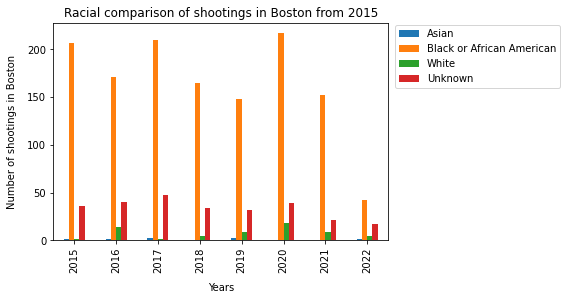

In [255]:
# Create a new DF for bar chart
# data = [gender_based_df['Year'].unique()]
gender_based_df = pd.DataFrame(data, years, columns=['Asian', 'Black or African American', 'White', 'Unknown'])
gender_based_df.plot.bar()
plt.title('Racial comparison of shootings in Boston from 2015')
plt.xlabel("Years", labelpad=10)
plt.ylabel("Number of shootings in Boston", labelpad=10)
plt.legend(loc=(1.02, .7))
plt.savefig('racial_comparison_of_shootings_in_boston.png', bbox_inches='tight', dpi=300)
plt.show()